In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib 
!pip install seaborn 
!pip install numpy
!pip install wordcloud
!pip install natasha
!pip install imbalanced-learn
!pip install optuna
!pip install lightgbm
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
dt = pd.read_csv("dt_razmetka.csv")
dt

annotation_id  annotator  \
0                 1          1   
1                 2          1   
2                 3          1   
3                 4          1   
4                 5          1   
...             ...        ...   
2363           2364          1   
2364           2365          1   
2365           2366          1   
2366           2367          1   
2367           2368          1   

                                                comment  \
0                                               —Å–ø–∞—Å–∏–±–æ   
1                                              —Å–ø–∞—Å–∏–±–æ!   
2                                              –û—Ç–ª–∏—á–Ω–æ    
3          –ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã !    
4                 –ü—Ä–µ–∫—Ä–∞—Å–Ω—ã–π —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç! –ü–æ–±–æ–ª—å—à–µ —Ç–∞–∫–∏—Ö   
...                                                 ...   
2363                                  –¥–æ–ª–≥–æ, –Ω–æ –ø—Ä–∏—è—Ç–Ω–æ   
2364  16.03.2024 –≥ —Ä–µ–±—è—Ç–∞ —É—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ –∫–æ–Ω–¥–∏—Ü–∏–æ–Ω–µ—Ä. —Ä–∞...   
2365          –¥–≤–∞ –¥–Ω—è –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥. —Å–µ–≥–æ–¥–Ω—è —Å —É—Ç—Ä–∞ —Ç–æ–∂–µ   
2366  –æ—Ç—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞—Ç—å –¥–≤–µ—Ä—å –∑–∞–º–∫–∏ . –¥–ª—è –¥–æ–ª–∂–Ω–æ–≥–æ –æ—Ç–∫—Ä...   
2367                                 –≤—Å—ë —Å–¥–µ–ª–∞–Ω–æ —Ö–æ—Ä–æ—à–æ   

                       created_at       id  lead_time  rating  \
0     2025-05-10T18:07:26.873274Z  2945792     54.818       5   
1     2025-05-10T18:17:33.491488Z  3234340      4.320       5   
2     2025-05-10T18:17:39.232246Z  3380332      3.511       5   
3     2025-05-10T18:17:52.546168Z  3381812     11.797       5   
4     2025-05-10T18:18:12.825646Z  3461991     13.906       5   
...                           ...      ...        ...     ...   
2363  2025-05-11T01:15:30.134768Z  3507812      4.984       5   
2364  2025-05-11T01:15:46.586738Z  3478532     14.530       5   
2365  2025-05-11T01:16:02.752642Z  3296403      5.780       5   
2366  2025-05-11T01:16:43.774264Z  3165822     39.637       5   
2367  2025-05-11T01:16:50.171909Z  2991660      4.990       5   

                                              sentiment  \
0                                          –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
1                                          –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
2                                          –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
3     {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ...   
4     {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏...   
...                                                 ...   
2363  {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤...   
2364  {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤...   
2365                –Ω–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –Ω–∏ –∫ –æ–¥–Ω–æ–º—É –∏–∑ –ø—É–Ω–∫—Ç–æ–≤   
2366                                       –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
2367                                       –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   

                       updated_at  –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω  \
0     2025-05-10T18:17:26.495821Z           NaN   
1     2025-05-10T18:17:33.491488Z           NaN   
2     2025-05-10T18:17:39.232246Z           NaN   
3     2025-05-10T18:17:52.546168Z           NaN   
4     2025-05-10T18:18:12.825646Z           NaN   
...                           ...           ...   
2363  2025-05-11T01:15:33.591664Z           NaN   
2364  2025-05-11T01:15:49.605518Z           NaN   
2365  2025-05-11T01:16:02.752642Z           NaN   
2366  2025-05-11T01:16:43.774264Z           NaN   
2367  2025-05-11T01:16:50.171909Z           NaN   

      –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
...                                   ...   

In [3]:
dt_pr = pd.read_csv("dt_posle_razmetki.csv")
dt_pr

annotation_id  annotator  \
0                 1          1   
1                 2          1   
2                 3          1   
3                 4          1   
4                 5          1   
...             ...        ...   
2363           2364          1   
2364           2365          1   
2365           2366          1   
2366           2367          1   
2367           2368          1   

                                                comment  \
0                                               —Å–ø–∞—Å–∏–±–æ   
1                                              —Å–ø–∞—Å–∏–±–æ!   
2                                              –û—Ç–ª–∏—á–Ω–æ    
3          –ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã !    
4                 –ü—Ä–µ–∫—Ä–∞—Å–Ω—ã–π —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç! –ü–æ–±–æ–ª—å—à–µ —Ç–∞–∫–∏—Ö   
...                                                 ...   
2363                                  –¥–æ–ª–≥–æ, –Ω–æ –ø—Ä–∏—è—Ç–Ω–æ   
2364  16.03.2024 –≥ —Ä–µ–±—è—Ç–∞ —É—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ –∫–æ–Ω–¥–∏—Ü–∏–æ–Ω–µ—Ä. —Ä–∞...   
2365          –¥–≤–∞ –¥–Ω—è –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥. —Å–µ–≥–æ–¥–Ω—è —Å —É—Ç—Ä–∞ —Ç–æ–∂–µ   
2366  –æ—Ç—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞—Ç—å –¥–≤–µ—Ä—å –∑–∞–º–∫–∏ . –¥–ª—è –¥–æ–ª–∂–Ω–æ–≥–æ –æ—Ç–∫—Ä...   
2367                                 –≤—Å—ë —Å–¥–µ–ª–∞–Ω–æ —Ö–æ—Ä–æ—à–æ   

                       created_at       id  lead_time  rating  \
0     2025-05-10T18:07:26.873274Z  2945792     54.818       5   
1     2025-05-10T18:17:33.491488Z  3234340      4.320       5   
2     2025-05-10T18:17:39.232246Z  3380332      3.511       5   
3     2025-05-10T18:17:52.546168Z  3381812     11.797       5   
4     2025-05-10T18:18:12.825646Z  3461991     13.906       5   
...                           ...      ...        ...     ...   
2363  2025-05-11T01:15:30.134768Z  3507812      4.984       5   
2364  2025-05-11T01:15:46.586738Z  3478532     14.530       5   
2365  2025-05-11T01:16:02.752642Z  3296403      5.780       5   
2366  2025-05-11T01:16:43.774264Z  3165822     39.637       5   
2367  2025-05-11T01:16:50.171909Z  2991660      4.990       5   

                                              sentiment  \
0                                          –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
1                                          –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
2                                          –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
3     {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ...   
4     {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏...   
...                                                 ...   
2363  {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤...   
2364  {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤...   
2365                –Ω–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –Ω–∏ –∫ –æ–¥–Ω–æ–º—É –∏–∑ –ø—É–Ω–∫—Ç–æ–≤   
2366                                       –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
2367                                       –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   

                       updated_at  –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω  \
0     2025-05-10T18:17:26.495821Z           NaN   
1     2025-05-10T18:17:33.491488Z           NaN   
2     2025-05-10T18:17:39.232246Z           NaN   
3     2025-05-10T18:17:52.546168Z           NaN   
4     2025-05-10T18:18:12.825646Z           NaN   
...                           ...           ...   
2363  2025-05-11T01:15:33.591664Z           NaN   
2364  2025-05-11T01:15:49.605518Z           NaN   
2365  2025-05-11T01:16:02.752642Z           NaN   
2366  2025-05-11T01:16:43.774264Z           NaN   
2367  2025-05-11T01:16:50.171909Z           NaN   

      –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
...                                   ...   

In [4]:
dt_pr.columns

Index(['annotation_id', 'annotator', 'comment', 'created_at', 'id',
       'lead_time', 'rating', 'sentiment', 'updated_at', '–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω',
       '–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏',
       '–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤',
       '–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫', '–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏'],
      dtype='object')

In [5]:
import ast

# –°–ø–∏—Å–æ–∫ —Ü–µ–ª–µ–≤—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π
categories = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏",
    "–Ω–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –Ω–∏ –∫ –æ–¥–Ω–æ–º—É –∏–∑ –ø—É–Ω–∫—Ç–æ–≤"
]

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –æ–¥–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ sentiment
def parse_sentiment(sentiment_value):
    if isinstance(sentiment_value, str) and '"choices"' in sentiment_value:
        try:
            parsed = ast.literal_eval(sentiment_value)
            return parsed.get("choices", [])
        except Exception as err:
            return f"–û—à–∏–±–∫–∞ —Ä–∞–∑–±–æ—Ä–∞: {err}"
    elif sentiment_value in categories:
        return [sentiment_value]
    return []

# –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–∫ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
for index, row in dt_pr.iterrows():
    result = parse_sentiment(row.get("sentiment", ""))
    if isinstance(result, list):
        for label in result:
            if label in categories:
                dt_pr.at[index, label] = 1
    elif isinstance(result, str) and result.startswith("–û—à–∏–±–∫–∞"):
        print(f"–û—à–∏–±–∫–∞ –≤ —Å—Ç—Ä–æ–∫–µ {index}: {result}")

dt_pr


annotation_id  annotator  \
0                 1          1   
1                 2          1   
2                 3          1   
3                 4          1   
4                 5          1   
...             ...        ...   
2363           2364          1   
2364           2365          1   
2365           2366          1   
2366           2367          1   
2367           2368          1   

                                                comment  \
0                                               —Å–ø–∞—Å–∏–±–æ   
1                                              —Å–ø–∞—Å–∏–±–æ!   
2                                              –û—Ç–ª–∏—á–Ω–æ    
3          –ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã !    
4                 –ü—Ä–µ–∫—Ä–∞—Å–Ω—ã–π —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç! –ü–æ–±–æ–ª—å—à–µ —Ç–∞–∫–∏—Ö   
...                                                 ...   
2363                                  –¥–æ–ª–≥–æ, –Ω–æ –ø—Ä–∏—è—Ç–Ω–æ   
2364  16.03.2024 –≥ —Ä–µ–±—è—Ç–∞ —É—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ –∫–æ–Ω–¥–∏—Ü–∏–æ–Ω–µ—Ä. —Ä–∞...   
2365          –¥–≤–∞ –¥–Ω—è –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥. —Å–µ–≥–æ–¥–Ω—è —Å —É—Ç—Ä–∞ —Ç–æ–∂–µ   
2366  –æ—Ç—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞—Ç—å –¥–≤–µ—Ä—å –∑–∞–º–∫–∏ . –¥–ª—è –¥–æ–ª–∂–Ω–æ–≥–æ –æ—Ç–∫—Ä...   
2367                                 –≤—Å—ë —Å–¥–µ–ª–∞–Ω–æ —Ö–æ—Ä–æ—à–æ   

                       created_at       id  lead_time  rating  \
0     2025-05-10T18:07:26.873274Z  2945792     54.818       5   
1     2025-05-10T18:17:33.491488Z  3234340      4.320       5   
2     2025-05-10T18:17:39.232246Z  3380332      3.511       5   
3     2025-05-10T18:17:52.546168Z  3381812     11.797       5   
4     2025-05-10T18:18:12.825646Z  3461991     13.906       5   
...                           ...      ...        ...     ...   
2363  2025-05-11T01:15:30.134768Z  3507812      4.984       5   
2364  2025-05-11T01:15:46.586738Z  3478532     14.530       5   
2365  2025-05-11T01:16:02.752642Z  3296403      5.780       5   
2366  2025-05-11T01:16:43.774264Z  3165822     39.637       5   
2367  2025-05-11T01:16:50.171909Z  2991660      4.990       5   

                                              sentiment  \
0                                          –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
1                                          –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
2                                          –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
3     {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ...   
4     {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏...   
...                                                 ...   
2363  {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤...   
2364  {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤...   
2365                –Ω–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –Ω–∏ –∫ –æ–¥–Ω–æ–º—É –∏–∑ –ø—É–Ω–∫—Ç–æ–≤   
2366                                       –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
2367                                       –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   

                       updated_at  –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω  \
0     2025-05-10T18:17:26.495821Z           1.0   
1     2025-05-10T18:17:33.491488Z           1.0   
2     2025-05-10T18:17:39.232246Z           1.0   
3     2025-05-10T18:17:52.546168Z           1.0   
4     2025-05-10T18:18:12.825646Z           1.0   
...                           ...           ...   
2363  2025-05-11T01:15:33.591664Z           1.0   
2364  2025-05-11T01:15:49.605518Z           1.0   
2365  2025-05-11T01:16:02.752642Z           NaN   
2366  2025-05-11T01:16:43.774264Z           1.0   
2367  2025-05-11T01:16:50.171909Z           1.0   

      –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
...                                   ...   

In [6]:
dubl = dt_pr.duplicated().sum()
dubl

0

In [7]:
colum = ['–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω',
    '–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏',
    '–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤',
    '–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫',
    '–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏',
    '–Ω–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –Ω–∏ –∫ –æ–¥–Ω–æ–º—É –∏–∑ –ø—É–Ω–∫—Ç–æ–≤']
dt_pr[colum] = dt_pr[colum].fillna(0)
dt_pr

annotation_id  annotator  \
0                 1          1   
1                 2          1   
2                 3          1   
3                 4          1   
4                 5          1   
...             ...        ...   
2363           2364          1   
2364           2365          1   
2365           2366          1   
2366           2367          1   
2367           2368          1   

                                                comment  \
0                                               —Å–ø–∞—Å–∏–±–æ   
1                                              —Å–ø–∞—Å–∏–±–æ!   
2                                              –û—Ç–ª–∏—á–Ω–æ    
3          –ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã !    
4                 –ü—Ä–µ–∫—Ä–∞—Å–Ω—ã–π —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç! –ü–æ–±–æ–ª—å—à–µ —Ç–∞–∫–∏—Ö   
...                                                 ...   
2363                                  –¥–æ–ª–≥–æ, –Ω–æ –ø—Ä–∏—è—Ç–Ω–æ   
2364  16.03.2024 –≥ —Ä–µ–±—è—Ç–∞ —É—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ –∫–æ–Ω–¥–∏—Ü–∏–æ–Ω–µ—Ä. —Ä–∞...   
2365          –¥–≤–∞ –¥–Ω—è –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥. —Å–µ–≥–æ–¥–Ω—è —Å —É—Ç—Ä–∞ —Ç–æ–∂–µ   
2366  –æ—Ç—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞—Ç—å –¥–≤–µ—Ä—å –∑–∞–º–∫–∏ . –¥–ª—è –¥–æ–ª–∂–Ω–æ–≥–æ –æ—Ç–∫—Ä...   
2367                                 –≤—Å—ë —Å–¥–µ–ª–∞–Ω–æ —Ö–æ—Ä–æ—à–æ   

                       created_at       id  lead_time  rating  \
0     2025-05-10T18:07:26.873274Z  2945792     54.818       5   
1     2025-05-10T18:17:33.491488Z  3234340      4.320       5   
2     2025-05-10T18:17:39.232246Z  3380332      3.511       5   
3     2025-05-10T18:17:52.546168Z  3381812     11.797       5   
4     2025-05-10T18:18:12.825646Z  3461991     13.906       5   
...                           ...      ...        ...     ...   
2363  2025-05-11T01:15:30.134768Z  3507812      4.984       5   
2364  2025-05-11T01:15:46.586738Z  3478532     14.530       5   
2365  2025-05-11T01:16:02.752642Z  3296403      5.780       5   
2366  2025-05-11T01:16:43.774264Z  3165822     39.637       5   
2367  2025-05-11T01:16:50.171909Z  2991660      4.990       5   

                                              sentiment  \
0                                          –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
1                                          –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
2                                          –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
3     {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ...   
4     {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏...   
...                                                 ...   
2363  {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤...   
2364  {"choices":["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤...   
2365                –Ω–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –Ω–∏ –∫ –æ–¥–Ω–æ–º—É –∏–∑ –ø—É–Ω–∫—Ç–æ–≤   
2366                                       –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   
2367                                       –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω   

                       updated_at  –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω  \
0     2025-05-10T18:17:26.495821Z           1.0   
1     2025-05-10T18:17:33.491488Z           1.0   
2     2025-05-10T18:17:39.232246Z           1.0   
3     2025-05-10T18:17:52.546168Z           1.0   
4     2025-05-10T18:18:12.825646Z           1.0   
...                           ...           ...   
2363  2025-05-11T01:15:33.591664Z           1.0   
2364  2025-05-11T01:15:49.605518Z           1.0   
2365  2025-05-11T01:16:02.752642Z           0.0   
2366  2025-05-11T01:16:43.774264Z           1.0   
2367  2025-05-11T01:16:50.171909Z           1.0   

      –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   

In [8]:
rd = dt_pr[colum].sum()
rd

–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω                            2115.0
–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏      249.0
–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤     517.0
–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫       871.0
–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏            288.0
–Ω–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –Ω–∏ –∫ –æ–¥–Ω–æ–º—É –∏–∑ –ø—É–Ω–∫—Ç–æ–≤      235.0
dtype: float64

In [9]:
dt_pr = dt_pr.rename(columns={'–Ω–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –Ω–∏ –∫ –æ–¥–Ω–æ–º—É –∏–∑ –ø—É–Ω–∫—Ç–æ–≤': '–ü—Ä–æ–±–ª–µ–º—ã'})
dt_pr = dt_pr.drop(['created_at', 'updated_at', 'annotation_id', 'annotator', 'sentiment', 'lead_time','id'], axis=1)

dt_pr

comment  rating  –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω  \
0                                               —Å–ø–∞—Å–∏–±–æ       5           1.0   
1                                              —Å–ø–∞—Å–∏–±–æ!       5           1.0   
2                                              –û—Ç–ª–∏—á–Ω–æ        5           1.0   
3          –ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã !        5           1.0   
4                 –ü—Ä–µ–∫—Ä–∞—Å–Ω—ã–π —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç! –ü–æ–±–æ–ª—å—à–µ —Ç–∞–∫–∏—Ö       5           1.0   
...                                                 ...     ...           ...   
2363                                  –¥–æ–ª–≥–æ, –Ω–æ –ø—Ä–∏—è—Ç–Ω–æ       5           1.0   
2364  16.03.2024 –≥ —Ä–µ–±—è—Ç–∞ —É—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ –∫–æ–Ω–¥–∏—Ü–∏–æ–Ω–µ—Ä. —Ä–∞...       5           1.0   
2365          –¥–≤–∞ –¥–Ω—è –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥. —Å–µ–≥–æ–¥–Ω—è —Å —É—Ç—Ä–∞ —Ç–æ–∂–µ       5           0.0   
2366  –æ—Ç—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞—Ç—å –¥–≤–µ—Ä—å –∑–∞–º–∫–∏ . –¥–ª—è –¥–æ–ª–∂–Ω–æ–≥–æ –æ—Ç–∫—Ä...       5           1.0   
2367                                 –≤—Å—ë —Å–¥–µ–ª–∞–Ω–æ —Ö–æ—Ä–æ—à–æ       5           1.0   

      –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
2363                                  1.0   
2364                                  1.0   
2365                                  0.0   
2366                                  0.0   
2367                                  0.0   

      –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      1.0   
...                                    ...   
2363                                   0.0   
2364                                   1.0   
2365                                   0.0   
2366                                   0.0   
2367                                   0.0   

      –ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫  –ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏  \
0                                    0.0                            0.0   
1                                    0.0                            0.0   
2                                    0.0                            0.0   
3                                    1.0                            0.0   
4                                    0.0                            0.0   
...                                  ...                            ...   
2363                                 0.0                            1.0   
2364                                 0.0                            1.0   
2365                                 0.0                            0.0   
2366                                 0.0                            0.0   
2367                                 0.0                            0.0   

      –ü—Ä–æ–±–ª–µ–º—ã  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
...        ...  
2363       0.0  
2364       0.0  
2365       1.0  
2366       0.0  
2367       0.0  

[2368 rows x 8 columns]

In [10]:
klass_bopr = dt_pr[dt_pr["–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω"] != 0].copy()

columns_to_drop = [
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏",
    "–ü—Ä–æ–±–ª–µ–º—ã"
]
klass_bopr.drop(columns=columns_to_drop, inplace=True)


In [11]:
# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
klass_bopr["comment"] = klass_bopr["comment"].str.lower()

# –û—á–∏—Å—Ç–∫–∞ –æ—Ç –ª–∏—à–Ω–∏—Ö —Å–∏–º–≤–æ–ª–æ–≤ (—Ç–æ–ª—å–∫–æ –±—É–∫–≤—ã –∏ –ø—Ä–æ–±–µ–ª—ã)
klass_bopr["comment"] = klass_bopr["comment"].apply(
    lambda x: re.sub(r"[^–∞-—è—ëa-z\s]", "", x)
)

# –°–±–æ—Ä –≤—Å–µ—Ö —Å–ª–æ–≤ –≤ –æ–¥–∏–Ω —Å–ø–∏—Å–æ–∫
all_words = []
for comment in klass_bopr["comment"]:
    all_words.extend(comment.split())

# –ü–æ–¥—Å—á—ë—Ç —á–∞—Å—Ç–æ—Ç—ã —Å–ª–æ–≤
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

# –í—ã–≤–æ–¥ —Ç–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤
print("–¢–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:")
for word, count in top_words:
    print(f"{word}: {count} —Ä–∞–∑")


–¢–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:
—Å–ø–∞—Å–∏–±–æ: 1314 —Ä–∞–∑
–∑–∞: 371 —Ä–∞–∑
–±—ã—Å—Ç—Ä–æ: 355 —Ä–∞–∑
–∏: 340 —Ä–∞–∑
–±–æ–ª—å—à–æ–µ: 271 —Ä–∞–∑
–≤—Å–µ: 269 —Ä–∞–∑
–æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ: 257 —Ä–∞–∑
–æ—á–µ–Ω—å: 174 —Ä–∞–∑
–≤: 135 —Ä–∞–∑
–æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å: 134 —Ä–∞–∑


In [12]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è: –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —Ç–µ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ —É–∫–∞–∑–∞–Ω–æ "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏"
klass_bopr = dt_pr[dt_pr["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏"] != 0].copy()

# –£–¥–∞–ª–µ–Ω–∏–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π
columns_to_drop = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏",
    "–ü—Ä–æ–±–ª–µ–º—ã"
]
klass_bopr.drop(columns=columns_to_drop, inplace=True)

# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
klass_bopr["comment"] = klass_bopr["comment"].str.lower()

# –û—á–∏—Å—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ –æ—Ç –≤—Å–µ—Ö —Å–∏–º–≤–æ–ª–æ–≤, –∫—Ä–æ–º–µ –±—É–∫–≤ –∏ –ø—Ä–æ–±–µ–ª–æ–≤
klass_bopr["comment"] = klass_bopr["comment"].apply(
    lambda x: re.sub(r"[^–∞-—è—ëa-z\s]", "", x)
)

# –°–±–æ—Ä –≤—Å–µ—Ö —Å–ª–æ–≤ –≤ –æ–¥–∏–Ω —Å–ø–∏—Å–æ–∫
all_words = []
for comment in klass_bopr["comment"]:
    all_words.extend(comment.split())

# –ü–æ–¥—Å—á—ë—Ç –∏ –≤—ã–≤–æ–¥ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

print("–¢–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:")
for word, count in top_words:
    print(f"{word}: {count} —Ä–∞–∑")


–¢–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:
—Å–ø–∞—Å–∏–±–æ: 137 —Ä–∞–∑
–∏: 113 —Ä–∞–∑
–∑–∞: 77 —Ä–∞–∑
–±—ã—Å—Ç—Ä–æ: 66 —Ä–∞–∑
–≤—Å–µ: 60 —Ä–∞–∑
–æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ: 42 —Ä–∞–∑
–≤: 40 —Ä–∞–∑
–æ—á–µ–Ω—å: 38 —Ä–∞–∑
–±–æ–ª—å—à–æ–µ: 33 —Ä–∞–∑
–Ω–∞: 31 —Ä–∞–∑


In [13]:
# –û—Ç–±–æ—Ä —Å—Ç—Ä–æ–∫ —Å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–π –æ—Ü–µ–Ω–∫–æ–π —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤
klass_bopr = dt_pr[dt_pr["–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤"] != 0].copy()

# –£–¥–∞–ª–µ–Ω–∏–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π
columns_to_drop = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏",
    "–ü—Ä–æ–±–ª–µ–º—ã"
]
klass_bopr.drop(columns=columns_to_drop, inplace=True)

# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
klass_bopr["comment"] = klass_bopr["comment"].str.lower()

# –û—á–∏—Å—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞: –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –±—É–∫–≤—ã –∏ –ø—Ä–æ–±–µ–ª—ã
klass_bopr["comment"] = klass_bopr["comment"].apply(
    lambda x: re.sub(r"[^–∞-—è—ëa-z\s]", "", x)
)

# –°–±–æ—Ä –≤—Å–µ—Ö —Å–ª–æ–≤ –≤ —Å–ø–∏—Å–æ–∫
all_words = []
for comment in klass_bopr["comment"]:
    all_words.extend(comment.split())

# –ü–æ–¥—Å—á—ë—Ç –∏ –≤—ã–≤–æ–¥ —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

print("–¢–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:")
for word, count in top_words:
    print(f"{word}: {count} —Ä–∞–∑")


–¢–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:
—Å–ø–∞—Å–∏–±–æ: 280 —Ä–∞–∑
–∏: 174 —Ä–∞–∑
–≤—Å–µ: 119 —Ä–∞–∑
–±—ã—Å—Ç—Ä–æ: 118 —Ä–∞–∑
–∑–∞: 93 —Ä–∞–∑
–º–∞—Å—Ç–µ—Ä: 86 —Ä–∞–∑
–±–æ–ª—å—à–æ–µ: 79 —Ä–∞–∑
–æ—á–µ–Ω—å: 72 —Ä–∞–∑
–≤: 66 —Ä–∞–∑
–æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ: 64 —Ä–∞–∑


In [14]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É: "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫"
klass_bopr = dt_pr[dt_pr["–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫"] != 0].copy()

# –£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–∞–∫—Ç—É–∞–ª—å–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π
columns_to_drop = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏",
    "–ü—Ä–æ–±–ª–µ–º—ã"
]
klass_bopr.drop(columns=columns_to_drop, inplace=True)

# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
klass_bopr["comment"] = klass_bopr["comment"].str.lower()

# –û—á–∏—Å—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞: –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –±—É–∫–≤—ã –∏ –ø—Ä–æ–±–µ–ª—ã
klass_bopr["comment"] = klass_bopr["comment"].apply(
    lambda x: re.sub(r"[^–∞-—è—ëa-z\s]", "", x)
)

# –°–±–æ—Ä –≤—Å–µ—Ö —Å–ª–æ–≤ –≤ —Å–ø–∏—Å–æ–∫
all_words = []
for comment in klass_bopr["comment"]:
    all_words.extend(comment.split())

# –ü–æ–¥—Å—á—ë—Ç –∏ –≤—ã–≤–æ–¥ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

print("–¢–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:")
for word, count in top_words:
    print(f"{word}: {count} —Ä–∞–∑")


–¢–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:
—Å–ø–∞—Å–∏–±–æ: 489 —Ä–∞–∑
–±—ã—Å—Ç—Ä–æ: 318 —Ä–∞–∑
–∑–∞: 258 —Ä–∞–∑
–æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ: 248 —Ä–∞–∑
–∏: 245 —Ä–∞–∑
–≤—Å–µ: 146 —Ä–∞–∑
–æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ—Å—Ç—å: 133 —Ä–∞–∑
–æ—á–µ–Ω—å: 129 —Ä–∞–∑
–±–æ–ª—å—à–æ–µ: 98 —Ä–∞–∑
–≤: 80 —Ä–∞–∑


In [15]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É: "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏"
klass_bopr = dt_pr[dt_pr["–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏"] != 0].copy()

# –£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–∞–∫—Ç—É–∞–ª—å–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π
columns_to_drop = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏",
    "–ü—Ä–æ–±–ª–µ–º—ã"
]
klass_bopr.drop(columns=columns_to_drop, inplace=True)

# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
klass_bopr["comment"] = klass_bopr["comment"].str.lower()

# –û—á–∏—Å—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞: –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –±—É–∫–≤—ã –∏ –ø—Ä–æ–±–µ–ª—ã
klass_bopr["comment"] = klass_bopr["comment"].apply(
    lambda x: re.sub(r"[^–∞-—è—ëa-z\s]", "", x)
)

# –°–±–æ—Ä –≤—Å–µ—Ö —Å–ª–æ–≤ –≤ —Å–ø–∏—Å–æ–∫
all_words = []
for comment in klass_bopr["comment"]:
    all_words.extend(comment.split())

# –ü–æ–¥—Å—á—ë—Ç –∏ –≤—ã–≤–æ–¥ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

print("–¢–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:")
for word, count in top_words:
    print(f"{word}: {count} —Ä–∞–∑")


–¢–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:
—Å–ø–∞—Å–∏–±–æ: 161 —Ä–∞–∑
–∏: 122 —Ä–∞–∑
–∑–∞: 84 —Ä–∞–∑
–≤—Å–µ: 68 —Ä–∞–∑
–±—ã—Å—Ç—Ä–æ: 67 —Ä–∞–∑
–æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ: 49 —Ä–∞–∑
–±–æ–ª—å—à–æ–µ: 43 —Ä–∞–∑
–æ—á–µ–Ω—å: 41 —Ä–∞–∑
–≤: 39 —Ä–∞–∑
–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ: 33 —Ä–∞–∑


In [16]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É: "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏"
klass_bopr = dt_pr[dt_pr["–ü—Ä–æ–±–ª–µ–º—ã"] != 0].copy()

# –£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–∞–∫—Ç—É–∞–ª—å–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π
columns_to_drop = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏",
    "–ü—Ä–æ–±–ª–µ–º—ã"
]
klass_bopr.drop(columns=columns_to_drop, inplace=True)

# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
klass_bopr["comment"] = klass_bopr["comment"].str.lower()

# –û—á–∏—Å—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞: –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –±—É–∫–≤—ã –∏ –ø—Ä–æ–±–µ–ª—ã
klass_bopr["comment"] = klass_bopr["comment"].apply(
    lambda x: re.sub(r"[^–∞-—è—ëa-z\s]", "", x)
)

# –°–±–æ—Ä –≤—Å–µ—Ö —Å–ª–æ–≤ –≤ —Å–ø–∏—Å–æ–∫
all_words = []
for comment in klass_bopr["comment"]:
    all_words.extend(comment.split())

# –ü–æ–¥—Å—á—ë—Ç –∏ –≤—ã–≤–æ–¥ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

print("–¢–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:")
for word, count in top_words:
    print(f"{word}: {count} —Ä–∞–∑")


–¢–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:
–Ω–µ: 132 —Ä–∞–∑
–≤: 78 —Ä–∞–∑
–∏: 56 —Ä–∞–∑
–Ω–∞: 39 —Ä–∞–∑
—á—Ç–æ: 32 —Ä–∞–∑
–∑–∞: 29 —Ä–∞–∑
—Ç–∞–∫: 24 —Ä–∞–∑
—Å: 24 —Ä–∞–∑
–ø–æ: 24 —Ä–∞–∑
–∫–∞–∫: 20 —Ä–∞–∑


In [17]:
df_train = dt_pr.copy()

df_train.to_csv("train_model.csv", index=False, encoding="utf-8-sig")

df_train

comment  rating  –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω  \
0                                               —Å–ø–∞—Å–∏–±–æ       5           1.0   
1                                              —Å–ø–∞—Å–∏–±–æ!       5           1.0   
2                                              –û—Ç–ª–∏—á–Ω–æ        5           1.0   
3          –ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã !        5           1.0   
4                 –ü—Ä–µ–∫—Ä–∞—Å–Ω—ã–π —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç! –ü–æ–±–æ–ª—å—à–µ —Ç–∞–∫–∏—Ö       5           1.0   
...                                                 ...     ...           ...   
2363                                  –¥–æ–ª–≥–æ, –Ω–æ –ø—Ä–∏—è—Ç–Ω–æ       5           1.0   
2364  16.03.2024 –≥ —Ä–µ–±—è—Ç–∞ —É—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ –∫–æ–Ω–¥–∏—Ü–∏–æ–Ω–µ—Ä. —Ä–∞...       5           1.0   
2365          –¥–≤–∞ –¥–Ω—è –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥. —Å–µ–≥–æ–¥–Ω—è —Å —É—Ç—Ä–∞ —Ç–æ–∂–µ       5           0.0   
2366  –æ—Ç—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞—Ç—å –¥–≤–µ—Ä—å –∑–∞–º–∫–∏ . –¥–ª—è –¥–æ–ª–∂–Ω–æ–≥–æ –æ—Ç–∫—Ä...       5           1.0   
2367                                 –≤—Å—ë —Å–¥–µ–ª–∞–Ω–æ —Ö–æ—Ä–æ—à–æ       5           1.0   

      –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
2363                                  1.0   
2364                                  1.0   
2365                                  0.0   
2366                                  0.0   
2367                                  0.0   

      –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      1.0   
...                                    ...   
2363                                   0.0   
2364                                   1.0   
2365                                   0.0   
2366                                   0.0   
2367                                   0.0   

      –ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫  –ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏  \
0                                    0.0                            0.0   
1                                    0.0                            0.0   
2                                    0.0                            0.0   
3                                    1.0                            0.0   
4                                    0.0                            0.0   
...                                  ...                            ...   
2363                                 0.0                            1.0   
2364                                 0.0                            1.0   
2365                                 0.0                            0.0   
2366                                 0.0                            0.0   
2367                                 0.0                            0.0   

      –ü—Ä–æ–±–ª–µ–º—ã  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
...        ...  
2363       0.0  
2364       0.0  
2365       1.0  
2366       0.0  
2367       0.0  

[2368 rows x 8 columns]

–ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–±–ª–µ–º–Ω–æ–π –∫–æ–ª–æ–Ω–∫–∏

In [18]:
df_train["–ü—Ä–æ–±–ª–µ–º—ã"].value_counts()


–ü—Ä–æ–±–ª–µ–º—ã
0.0    2133
1.0     235
Name: count, dtype: int64

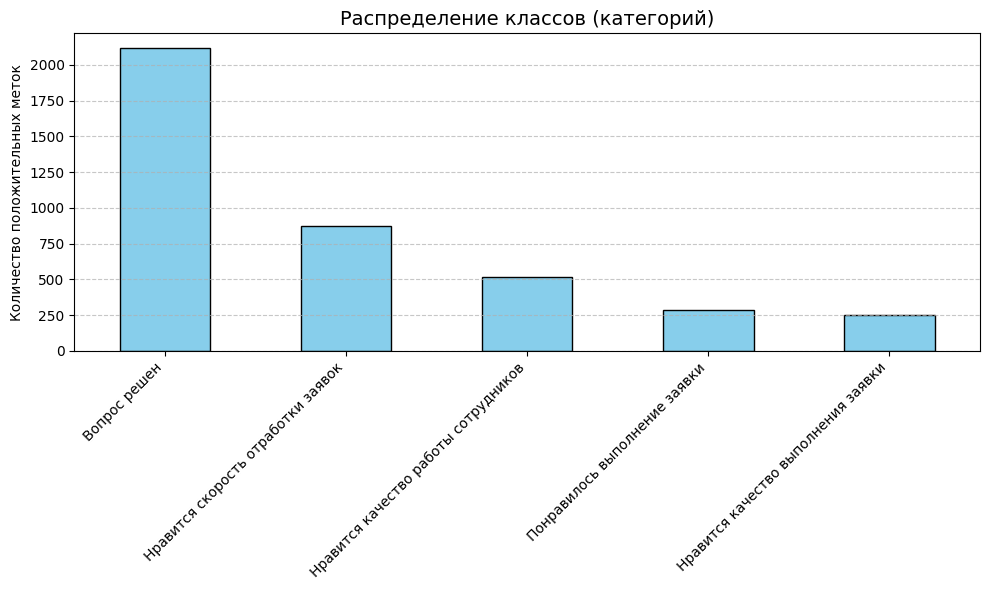

In [ ]:
import matplotlib.pyplot as plt

# –ö–∞—Ç–µ–≥–æ—Ä–∏–∏ (–∫–∞–∫ –≤ –º–æ–¥–µ–ª–∏)
categories = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏"
]

# –ü–æ–¥—Å—á—ë—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –º–µ—Ç–æ–∫ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
label_counts = df_train[categories].sum().sort_values(ascending=False)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ (–∫–∞—Ç–µ–≥–æ—Ä–∏–π)", fontsize=14)
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –º–µ—Ç–æ–∫")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

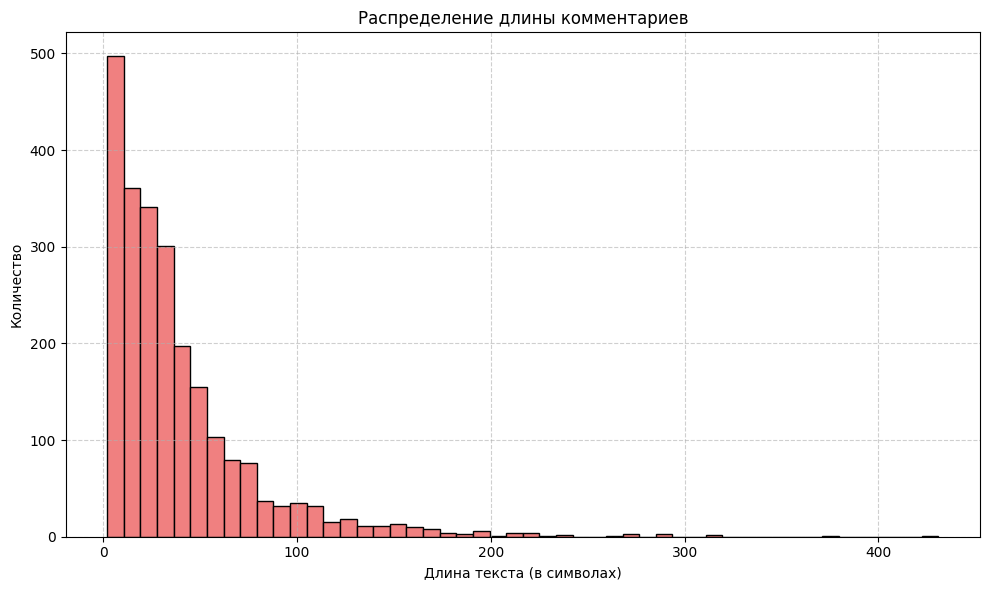

üü¢ –°–∞–º—ã–π –∫–æ—Ä–æ—Ç–∫–∏–π –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π:
–æ–∫

–î–ª–∏–Ω–∞: 2 —Å–∏–º–≤–æ–ª–æ–≤

--------------------------------------------------------------------------------

üî¥ –°–∞–º—ã–π –¥–ª–∏–Ω–Ω—ã–π –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π:
16.03.2024 –≥ —Ä–µ–±—è—Ç–∞ —É—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ –∫–æ–Ω–¥–∏—Ü–∏–æ–Ω–µ—Ä. —Ä–∞–±–æ—Ç–∞ —Å–¥–µ–ª–∞–Ω–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ, –±–µ–∑ –ª–∏—à–Ω–µ–≥–æ —à—É–º–∞, –≥—Ä—è–∑–∏ –∏ –±—ã—Å—Ç—Ä–æ. –º–∏—Ö–∞–∏–ª (–º–µ–Ω–µ–¥–∂–µ—Ä) –æ—Ç–≤–µ—Ç–∏–ª –Ω–∞ –≤—Å–µ –≤–æ–ø—Ä–æ—Å—ã, –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏–ª –≤—Å—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –¥–∞–ª –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω—ã–µ —Å–æ–≤–µ—Ç—ã –∏ –æ—Ç–ø—Ä–∞–≤–∏–ª –ø—Ä–µ–∫—Ä–∞—Å–Ω—É—é –±—Ä–∏–≥–∞–¥—É: –Ω–∏–∫–æ–ª–∞—è (–∞–ª—å–ø–∏–Ω–∏—Å—Ç-–º–æ–Ω—Ç–∞–∂–Ω–∏–∫) –∏ —Å–µ—Ä–≥–µ—è - —Å—ë–º–∞ (–º–æ–Ω—Ç–∞–∂–Ω–∏–∫- —ç–ª–µ–∫—Ç—Ä–∏–∫). —Ä–µ–±—è—Ç–∞ –≤–µ–∂–ª–∏–≤—ã–µ, –∞–∫–∫—É—Ä–∞—Ç–Ω—ã–µ, –¥–æ–±—Ä–æ–∂–µ–ª–∞—Ç–µ–ª—å–Ω—ã–µ. –æ—Ç–ª–∏—á–Ω—ã–µ —Ä–∞–±–æ—Ç–Ω–∏–∫–∏. –±–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª–∏–∑–º –∏ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –≤ –∫–

In [24]:
# –î–æ–±–∞–≤–∏–º –∫–æ–ª–æ–Ω–∫—É —Å –¥–ª–∏–Ω–æ–π —Ç–µ–∫—Å—Ç–∞
df_train["text_length"] = df_train["comment"].astype(str).apply(len)

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª–∏–Ω—ã
plt.figure(figsize=(10, 6))
plt.hist(df_train["text_length"], bins=50, color="lightcoral", edgecolor="black")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤")
plt.xlabel("–î–ª–∏–Ω–∞ —Ç–µ–∫—Å—Ç–∞ (–≤ —Å–∏–º–≤–æ–ª–∞—Ö)")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# –ù–∞—Ö–æ–¥–∏–º –∏–Ω–¥–µ–∫—Å —Å–∞–º–æ–≥–æ –∫–æ—Ä–æ—Ç–∫–æ–≥–æ –∏ —Å–∞–º–æ–≥–æ –¥–ª–∏–Ω–Ω–æ–≥–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è
min_len_idx = df_train["text_length"].idxmin()
max_len_idx = df_train["text_length"].idxmax()

# –°–∞–º—ã–π –∫–æ—Ä–æ—Ç–∫–∏–π –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
print("üü¢ –°–∞–º—ã–π –∫–æ—Ä–æ—Ç–∫–∏–π –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π:")
print(df_train.loc[min_len_idx, "comment"])
print(f"\n–î–ª–∏–Ω–∞: {df_train.loc[min_len_idx, 'text_length']} —Å–∏–º–≤–æ–ª–æ–≤")

print("\n" + "-"*80 + "\n")

# –°–∞–º—ã–π –¥–ª–∏–Ω–Ω—ã–π –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
print("üî¥ –°–∞–º—ã–π –¥–ª–∏–Ω–Ω—ã–π –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π:")
print(df_train.loc[max_len_idx, "comment"])
print(f"\n–î–ª–∏–Ω–∞: {df_train.loc[max_len_idx, 'text_length']} —Å–∏–º–≤–æ–ª–æ–≤")


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏

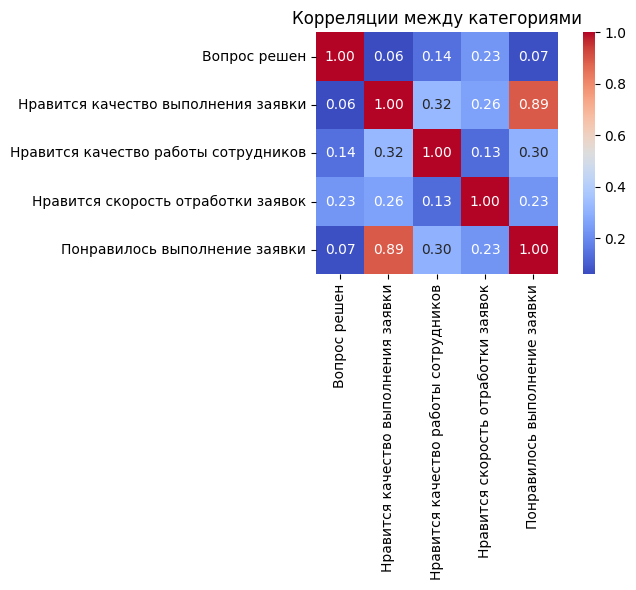

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# –ö–∞—Ç–µ–≥–æ—Ä–∏–∏
categories = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏"
]

# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞
corr_matrix = df_train[categories].corr()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏")
plt.tight_layout()
plt.show()


–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ WordCloud –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º

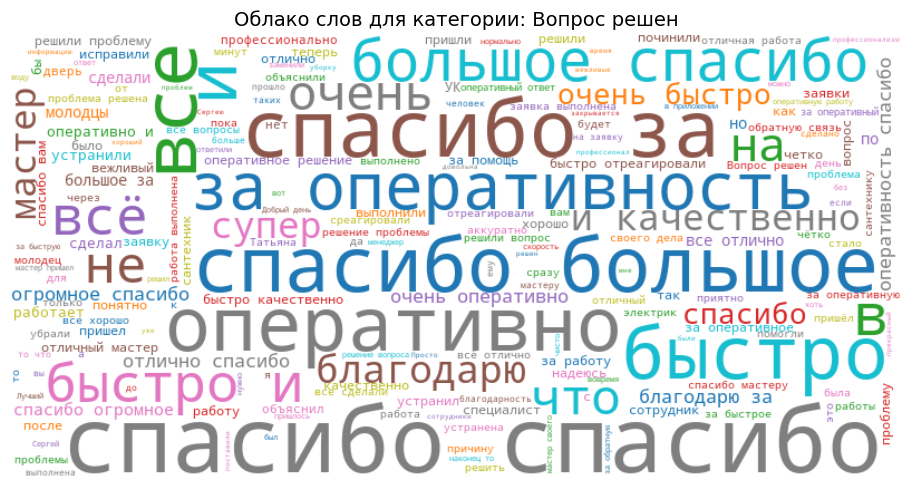

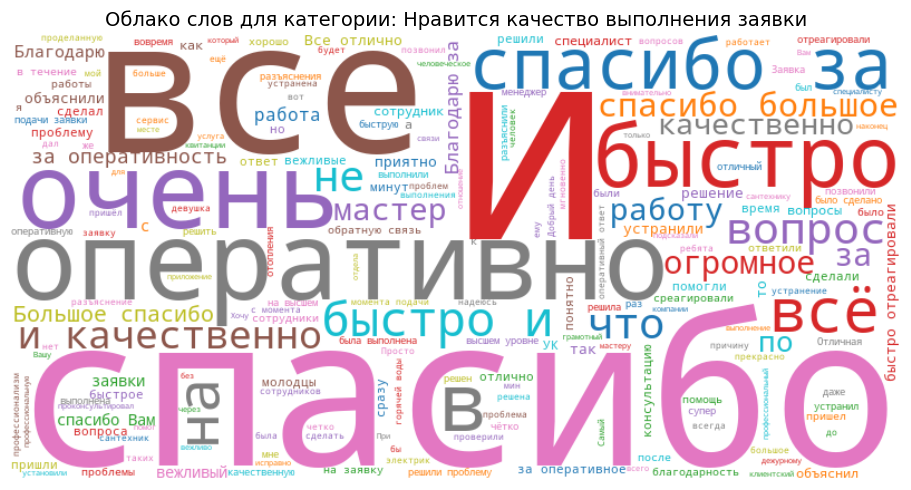

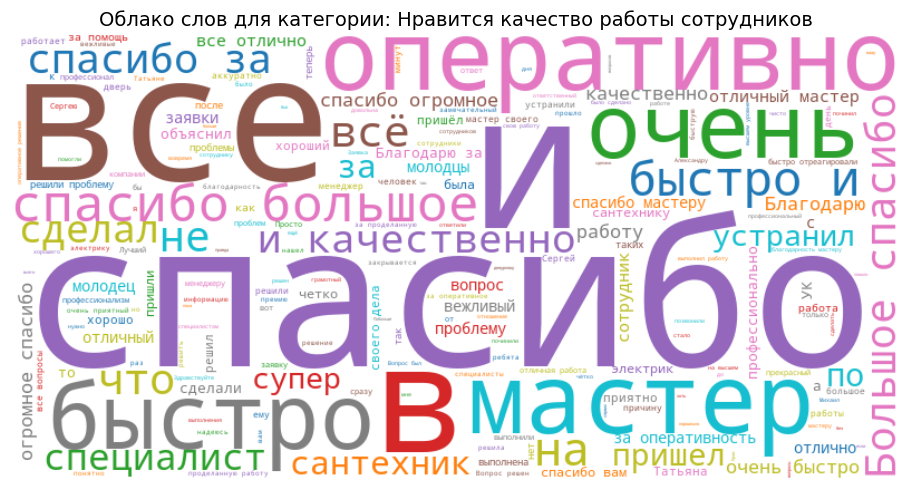

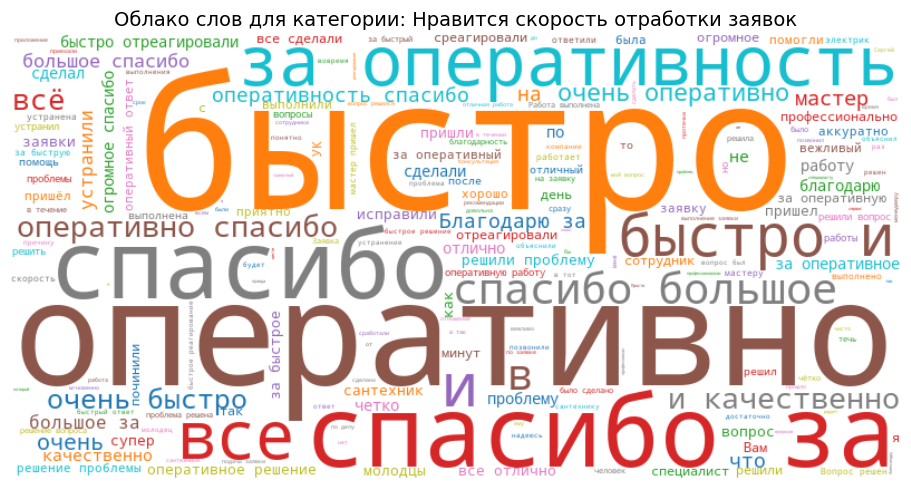

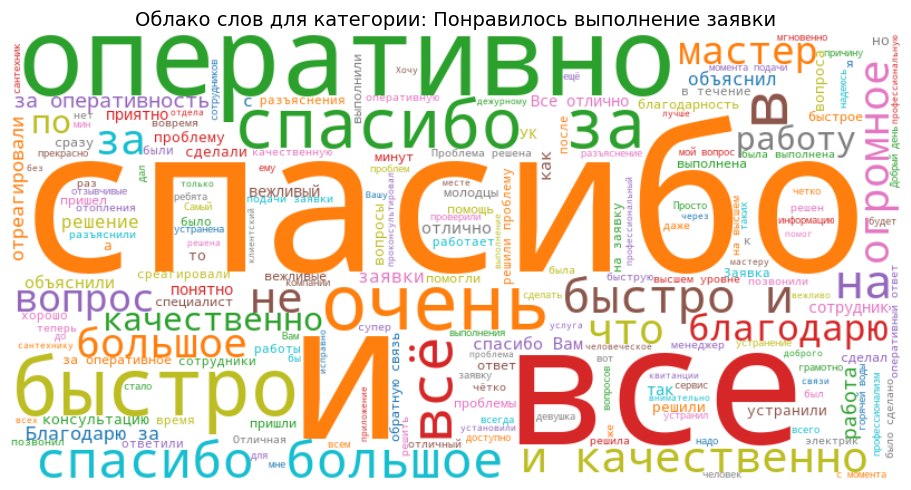

In [ ]:
import matplotlib.pyplot as plt

# –ù–∞—Å—Ç—Ä–æ–∏–º –æ—Ç—Ä–∏—Å–æ–≤–∫—É —Ä—É—Å—Å–∫–∏—Ö —Å–ª–æ–≤
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # –î–ª—è –∫–∏—Ä–∏–ª–ª–∏—Ü—ã

# –ö–∞—Ç–µ–≥–æ—Ä–∏–∏
categories = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏"
]

# –°—Ç—Ä–æ–∏–º WordCloud –¥–ª—è –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
for category in categories:
    text = " ".join(df_train[df_train[category] == 1]["comment"].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="tab10").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"–û–±–ª–∞–∫–æ —Å–ª–æ–≤ –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∏: {category}", fontsize=14)
    plt.tight_layout()
    plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# –¶–µ–ª–µ–≤—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
categories = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏"
]

# –¢–µ–∫—Å—Ç–æ–≤–∞—è –∫–æ–ª–æ–Ω–∫–∞ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
text_column = "comment"  # –∏–ª–∏ "lemmatized", –µ—Å–ª–∏ —Ö–æ—á–µ—à—å

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
X = df_train[text_column]
y = df_train[categories]

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model = MultiOutputClassifier(LogisticRegression(max_iter=1000, class_weight='balanced'))
model.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∏ –æ—Ç—á—ë—Ç
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))


                                      precision    recall  f1-score   support

                        –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω       0.99      0.89      0.94       432
 –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏       0.26      0.48      0.34        48
–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤       0.56      0.62      0.59       107
  –ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫       0.91      0.85      0.88       189
       –ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏       0.27      0.47      0.35        59

                           micro avg       0.76      0.80      0.78       835
                           macro avg       0.60      0.66      0.62       835
                        weighted avg       0.83      0.80      0.81       835
                         samples avg       0.74      0.77      0.73       835



–°–ª–∞–±–æ–≤–∞—Ç–æ, –ø—Ä–æ–±—É–µ–º –¥–∞–ª—å—à–µ

–†–∞–Ω–¥–æ–º —Ñ–æ—Ä–µ—Å—Ç

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

# –¶–µ–ª–µ–≤—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
categories = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏"
]

# –¢–µ–∫—Å—Ç–æ–≤–∞—è –∫–æ–ª–æ–Ω–∫–∞ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
text_column = "comment"  # –º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–∞ "lemmatized", –µ—Å–ª–∏ –±—É–¥–µ—Ç –≥–æ—Ç–æ–≤–æ

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
X = df_train[text_column]
y = df_train[categories]

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
model = MultiOutputClassifier(rf)
model.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∏ –æ—Ç—á—ë—Ç
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))


                                      precision    recall  f1-score   support

                        –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω       0.97      0.97      0.97       432
 –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏       0.38      0.06      0.11        48
–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤       0.82      0.48      0.60       107
  –ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫       0.92      0.82      0.87       189
       –ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏       0.33      0.05      0.09        59

                           micro avg       0.93      0.76      0.83       835
                           macro avg       0.68      0.48      0.53       835
                        weighted avg       0.86      0.76      0.79       835
                         samples avg       0.86      0.78      0.79       835



–†–∞–Ω–¥–æ–º —Ñ–æ—Ä–µ—Å—Ç —Å –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–µ–π

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score
import numpy as np

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
n_splits = 5
random_state = 42
text_column = "comment"  # –∏–ª–∏ "lemmatized"

# –î–∞–Ω–Ω—ã–µ
X = df_train[text_column]
y = df_train[categories]

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è
vectorizer = TfidfVectorizer(max_features=5000)

# –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
all_f1_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train_text, X_test_text = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train_vec = vectorizer.fit_transform(X_train_text)
    X_test_vec = vectorizer.transform(X_test_text)

    rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
    model = MultiOutputClassifier(rf)
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)

    print(f"\n=== Fold {fold} ===")
    print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))

    # F1-score –ø–æ samples (–º–æ–∂–Ω–æ –∏ micro/macro —Å—á–∏—Ç–∞—Ç—å)
    f1 = f1_score(y_test, y_pred, average="samples", zero_division=0)
    all_f1_scores.append(f1)
    print(f"Samples F1-score: {f1:.4f}")

# –°—Ä–µ–¥–Ω–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print(f"\n–°—Ä–µ–¥–Ω–∏–π samples F1-score –ø–æ {n_splits} —Ñ–æ–ª–¥–∞–º: {np.mean(all_f1_scores):.4f}")



=== Fold 1 ===
                                      precision    recall  f1-score   support

                        –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω       0.97      0.96      0.97       432
 –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏       0.50      0.12      0.20        48
–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤       0.82      0.50      0.62       107
  –ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫       0.92      0.85      0.88       189
       –ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏       0.27      0.05      0.09        59

                           micro avg       0.93      0.77      0.84       835
                           macro avg       0.70      0.50      0.55       835
                        weighted avg       0.86      0.77      0.80       835
                         samples avg       0.85      0.78      0.79       835

Samples F1-score: 0.7911

=== Fold 2 ===
                          

Oversampling –¥–ª—è —Ä–µ–¥–∫–∏—Ö –∫–ª–∞—Å—Å–æ–≤ + –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import numpy as np
import pandas as pd
import re

# –ö–∞—Å—Ç–æ–º–Ω—ã–π —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä –¥–ª—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Ñ–∏—á
class TextStatsExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lengths = X.apply(len).values.reshape(-1, 1)
        word_counts = X.apply(lambda x: len(x.split())).values.reshape(-1, 1)
        punct_counts = X.apply(lambda x: len(re.findall(r'[.,!?]', x))).values.reshape(-1, 1)
        return np.hstack([lengths, word_counts, punct_counts])

# –¶–µ–ª–µ–≤—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
categories = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏"
]

# –î–∞–Ω–Ω—ã–µ
X = df_train["comment"]
y = df_train[categories]

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä
tfidf = TfidfVectorizer(max_features=5000)

# –°–æ–∑–¥–∞–µ–º –∫–æ–º–±–∏–Ω–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä —Å –¥–æ–ø. –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
X_tfidf = tfidf.fit_transform(X)

# –î–æ–±–∞–≤–ª—è–µ–º —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
text_stats = TextStatsExtractor()
X_stats = text_stats.transform(X)
X_stats = StandardScaler().fit_transform(X_stats)

# –û–±—ä–µ–¥–∏–Ω—è–µ–º sparse –∏ dense –º–∞—Ç—Ä–∏—Ü—ã
from scipy.sparse import csr_matrix

X_combined = hstack([X_tfidf, csr_matrix(X_stats)])

# –†–∞–∑–¥–µ–ª—è–µ–º –Ω–∞ train/test
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# –ü—Ä–∏–º–µ–Ω—è–µ–º oversampling –∫ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º –¥–∞–Ω–Ω—ã–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –±–∏–Ω–∞—Ä–Ω–æ–≥–æ –ª–µ–π–±–ª–∞
ros = RandomOverSampler(random_state=42)

y_train_sum = y_train.sum(axis=1)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train_sum)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
model = MultiOutputClassifier(rf)
model.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))
f1 = f1_score(y_test, y_pred, average="samples", zero_division=0)
print(f"Samples F1-score: {f1:.4f}")


                                      precision    recall  f1-score   support

                        –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω       0.97      0.97      0.97       432
 –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏       0.50      0.08      0.14        48
–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤       0.73      0.53      0.62       107
  –ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫       0.92      0.83      0.87       189
       –ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏       0.62      0.08      0.15        59

                           micro avg       0.92      0.77      0.84       835
                           macro avg       0.75      0.50      0.55       835
                        weighted avg       0.88      0.77      0.80       835
                         samples avg       0.85      0.78      0.80       835

Samples F1-score: 0.7959


–ü—Ä–æ–±—É—é Logistic Regression —Å MultiOutputClassifier –¥–ª—è –º–Ω–æ–≥–æ–º–µ—Ç–æ—á–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import re

# –ö–∞—Å—Ç–æ–º–Ω—ã–π —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä –¥–ª—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Ñ–∏—á
class TextStatsExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lengths = X.apply(len).values.reshape(-1, 1)
        word_counts = X.apply(lambda x: len(x.split())).values.reshape(-1, 1)
        punct_counts = X.apply(lambda x: len(re.findall(r'[.,!?]', x))).values.reshape(-1, 1)
        return np.hstack([lengths, word_counts, punct_counts])

# –ö–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
categories = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏"
]

# –î–∞–Ω–Ω—ã–µ
X = df_train["comment"]
y = df_train[categories]

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
text_stats = TextStatsExtractor()
X_stats = text_stats.transform(X)
X_stats = StandardScaler().fit_transform(X_stats)

# –û–±—ä–µ–¥–∏–Ω—è–µ–º sparse TF-IDF –∏ dense –ø—Ä–∏–∑–Ω–∞–∫–∏
X_combined = hstack([X_tfidf, csr_matrix(X_stats)])

# –†–∞–∑–±–∏–≤–∞–µ–º –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# –û–±—É—á–∞–µ–º Logistic Regression —Å MultiOutputClassifier
model = MultiOutputClassifier(LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1))
model.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫–∞
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))
print(f"Samples F1-score: {f1_score(y_test, y_pred, average='samples', zero_division=0):.4f}")


                                      precision    recall  f1-score   support

                        –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω       0.99      0.90      0.94       432
 –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏       0.24      0.50      0.33        48
–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤       0.57      0.64      0.61       107
  –ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫       0.90      0.85      0.88       189
       –ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏       0.28      0.49      0.36        59

                           micro avg       0.75      0.80      0.78       835
                           macro avg       0.60      0.68      0.62       835
                        weighted avg       0.83      0.80      0.81       835
                         samples avg       0.74      0.77      0.73       835

Samples F1-score: 0.7344


—Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–µ –Ω—Ä–∞–≤–∏—Ç—Å—è, –∏–¥–µ–º –¥–∞–ª—å—à–µ

LightGBM

In [48]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from scipy.sparse import hstack, csr_matrix
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import re

# –ö–∞—Å—Ç–æ–º–Ω—ã–π —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä –¥–ª—è –¥–æ–ø. –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
class TextStatsExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        lengths = X.apply(len).values.reshape(-1, 1)
        word_counts = X.apply(lambda x: len(x.split())).values.reshape(-1, 1)
        punct_counts = X.apply(lambda x: len(re.findall(r'[.,!?]', x))).values.reshape(-1, 1)
        return np.hstack([lengths, word_counts, punct_counts])

# –¶–µ–ª–µ–≤—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
categories = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏"
]

# –î–∞–Ω–Ω—ã–µ
X = df_train["comment"]
y = df_train[categories]

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# –î–æ–ø. —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
text_stats = TextStatsExtractor()
X_stats = text_stats.transform(X)
X_stats = StandardScaler().fit_transform(X_stats)

# –û–±—ä–µ–¥–∏–Ω—è–µ–º sparse –∏ dense –ø—Ä–∏–∑–Ω–∞–∫–∏
X_combined = hstack([X_tfidf, csr_matrix(X_stats)])

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/test
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è LightGBM –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞
lgbm = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# –û–±–µ—Ä—Ç–∫–∞ MultiOutputClassifier
model = MultiOutputClassifier(lgbm)

# –û–±—É—á–µ–Ω–∏–µ
model.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
y_pred = model.predict(X_test)

# –û—Ç—á—ë—Ç –∏ –º–µ—Ç—Ä–∏–∫–∞
print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))
print(f"Samples F1-score: {f1_score(y_test, y_pred, average='samples', zero_division=0):.4f}")


[LightGBM] [Info] Number of positive: 1683, number of negative: 211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1528
[LightGBM] [Info] Number of data points in the train set: 1894, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 201, number of negative: 1693
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1528
[LightGBM] [Info] Number of data points in the train set: 1894, number of used features: 59
[LightGBM] [Info] [binary:Bo

–ù–æ—Ä–º, —É–ª—É—á—à–∞–µ–º –º–æ–¥–µ–ª—å

–î–æ–±–∞–≤–∏–ª Optuna, –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–æ —Å—Ä–µ–¥–Ω–µ–π F1-score –ø–æ –≤—Å–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ TF-IDF

In [51]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, f1_score
from scipy.sparse import hstack, csr_matrix
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import re
import optuna

# –ö–∞—Å—Ç–æ–º–Ω—ã–π —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä –¥–ª—è –¥–æ–ø. –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
class TextStatsExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        lengths = X.apply(len).values.reshape(-1, 1)
        word_counts = X.apply(lambda x: len(x.split())).values.reshape(-1, 1)
        punct_counts = X.apply(lambda x: len(re.findall(r'[.,!?]', x))).values.reshape(-1, 1)
        return np.hstack([lengths, word_counts, punct_counts])

# –¶–µ–ª–µ–≤—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ (–ø—Ä–æ–ø–∏—à–∏ –ø–æ–¥ —Å–≤–æ–∏ –¥–∞–Ω–Ω—ã–µ)
categories = [
    "–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏",
    "–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤",
    "–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫",
    "–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏"
]

# –î–∞–Ω–Ω—ã–µ
X = df_train["comment"]
y = df_train[categories]

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# –î–æ–ø. —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
text_stats = TextStatsExtractor()
X_stats = text_stats.transform(X)
X_stats = StandardScaler().fit_transform(X_stats)

# –û–±—ä–µ–¥–∏–Ω—è–µ–º sparse –∏ dense –ø—Ä–∏–∑–Ω–∞–∫–∏
X_combined = hstack([X_tfidf, csr_matrix(X_stats)])

# –§—É–Ω–∫—Ü–∏—è-—Ü–µ–ª—å –¥–ª—è Optuna
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'f1',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'random_state': 42,
        'n_jobs': -1,
        'class_weight': 'balanced',
        'n_estimators': 200
    }
    
    scores = []
    for label in categories:
        model = lgb.LGBMClassifier(**param)
        score = cross_val_score(model, X_combined, y[label], cv=3, scoring='f1', n_jobs=-1).mean()
        scores.append(score)
    return np.mean(scores)

# –ó–∞–ø—É—Å–∫–∞–µ–º –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—é
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", study.best_params)

# –û–±—É—á–∞–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—É—é –º–æ–¥–µ–ª—å –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
best_params = study.best_params
best_params.update({
    'objective': 'binary',
    'metric': 'f1',
    'verbosity': -1,
    'random_state': 42,
    'n_jobs': -1,
    'class_weight': 'balanced',
    'n_estimators': 200
})

final_model = MultiOutputClassifier(lgb.LGBMClassifier(**best_params))
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
final_model.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))
print(f"Samples F1-score: {f1_score(y_test, y_pred, average='samples', zero_division=0):.4f}")


[I 2025-05-15 22:00:31,948] A new study created in memory with name: no-name-ee24ae36-0310-4852-b36e-c0f268557659
[I 2025-05-15 22:00:37,139] Trial 0 finished with value: 0.6202209409767404 and parameters: {'num_leaves': 52, 'max_depth': 9, 'learning_rate': 0.012563193836024427, 'min_child_samples': 9, 'feature_fraction': 0.9821910803231111, 'bagging_fraction': 0.9541504370442201, 'bagging_freq': 1}. Best is trial 0 with value: 0.6202209409767404.
[I 2025-05-15 22:00:38,538] Trial 1 finished with value: 0.6117917631879365 and parameters: {'num_leaves': 85, 'max_depth': 5, 'learning_rate': 0.020576024947412258, 'min_child_samples': 7, 'feature_fraction': 0.7604873659466669, 'bagging_fraction': 0.9283011089842904, 'bagging_freq': 2}. Best is trial 0 with value: 0.6202209409767404.
[I 2025-05-15 22:00:40,588] Trial 2 finished with value: 0.6081524380265431 and parameters: {'num_leaves': 61, 'max_depth': 10, 'learning_rate': 0.07801937248635149, 'min_child_samples': 10, 'feature_fraction':

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'num_leaves': 20, 'max_depth': 6, 'learning_rate': 0.04245966768819423, 'min_child_samples': 7, 'feature_fraction': 0.7600275603722746, 'bagging_fraction': 0.891228328039953, 'bagging_freq': 6}
                                      precision    recall  f1-score   support

                        –í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω       0.99      0.91      0.95       432
 –ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏       0.26      0.54      0.35        48
–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤       0.56      0.69      0.62       107
  –ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫       0.91      0.85      0.88       189
       –ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏       0.27      0.51      0.35        59

                           micro avg       0.74      0.82      0.78       835
                           macro avg       0.60      0.70      0.63       835
            

–ù–µ –æ—á–µ–Ω—å, –∏–¥–µ–º –¥–∞–ª—å—à–µ